# Titanic: Machine Learning from Disaster

### Predict survival on the Titanic:
- Defining the problem statement
- Collecting the data
- EDA (Exploratory data analysis)
- Feature engineering
- Feature selection
- Modelling
- Testing

## 1. Defining the problem statement

Complete the analysis of what sorts of people were likely to survive. We will try to see the pattern on basis of different categories.
In particular, apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
from IPython.display import Image

In [2]:
#Image('titanic_image.jpg')
Image(url='http://www.goodwp.com/large/201304/28246.jpg')

## 2. Collecting the data

### load, train and test dataset

Importing all the required libraries:
- pandas
- numpy
- matplotlib
- seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# displaying the plots in the notebook
%matplotlib inline

In [4]:
train=pd.read_csv('train.csv')

In [5]:
test=pd.read_csv('test.csv')

## 3. EDA (Exploratory data analysis)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Dictionary
- Survival: 0 = No, 1 = Yes
- pclass: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex
- Age in years
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

#### Total rows and columns

891 rows and 12 columns in our training data, and 418 rows and 1 less column in test data. Survival column is missing from the test data because we are going to predict that.

In [8]:
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see that values are missing for age, cabin and embarked.

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [91]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Bar Plot for categorical features

- Survived: 0 = No, 1 = Yes
- pclass: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic
- Cabin: Cabin number
- Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
def bar_plot(category):
    survived=train[train.Survived==1][category].value_counts()
    dead=train[train.Survived==0][category].value_counts()
    df=pd.DataFrame(data=[survived,dead],index=['Survived','Dead'])
    df.plot(kind='bar',figsize=(10,5))

male      577
female    314
Name: Sex, dtype: int64

People who Survived
 female    233
male      109
Name: Sex, dtype: int64


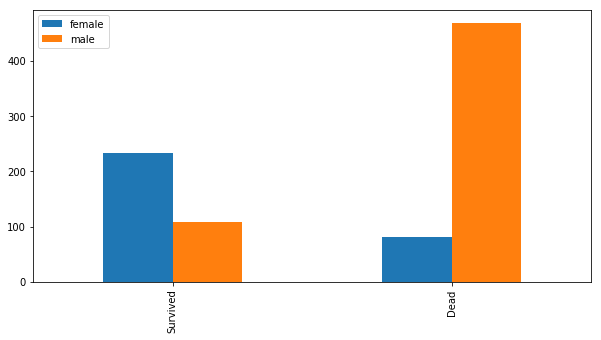

In [7]:
bar_plot('Sex')
print(train['Sex'].value_counts())
print("\nPeople who Survived\n",train[train.Survived==1]['Sex'].value_counts())

Female had larger chances of survival than male. *Most male died*.

3    491
1    216
2    184
Name: Pclass, dtype: int64

People who Survived
 1    136
3    119
2     87
Name: Pclass, dtype: int64


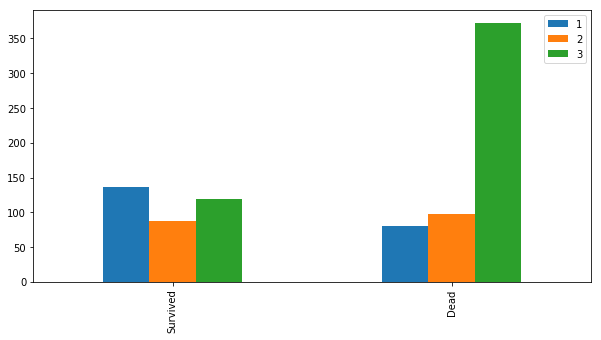

In [14]:
bar_plot('Pclass')
print(train['Pclass'].value_counts())
print("\nPeople who Survived\n",train[train.Survived==1]['Pclass'].value_counts())

__Pclass 1 had a larger chance of survival__. Most of the class 2 died and a very small percentage of class 3 survived. Class 3 had almost no chance of survival. 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

People who Survived
 S    217
C     93
Q     30
Name: Embarked, dtype: int64


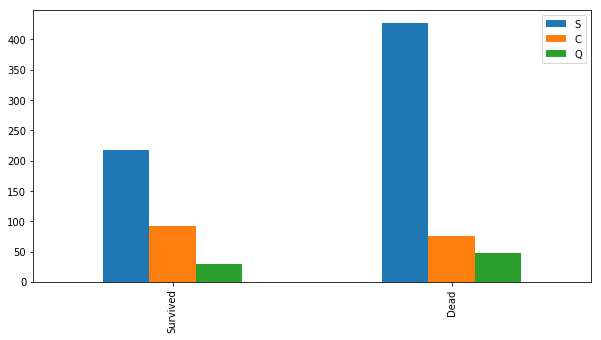

In [15]:
bar_plot('Embarked')
print(train['Embarked'].value_counts())
print("\nPeople who Survived\n",train[train.Survived==1]['Embarked'].value_counts())

People who boarded from **Southampton and Queenstown are most likely to die**. Cherbourg people most likely survived. 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

People who Survived
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64


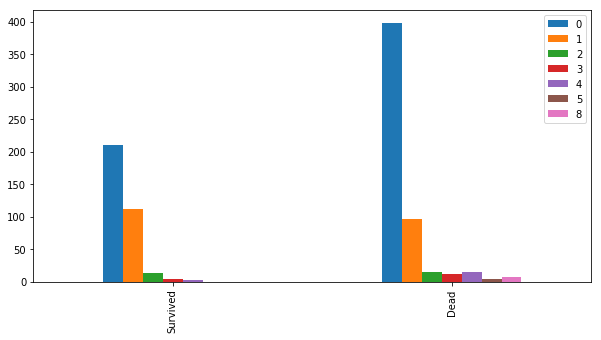

In [16]:
bar_plot('SibSp')
print(train['SibSp'].value_counts())
print("\nPeople who Survived\n",train[train.Survived==1]['SibSp'].value_counts())

People who came alone most propably died. Chances of living are more for people who came with family
Also it looks like most came alone. We can verify that

In [17]:
train[train['SibSp']==0]['PassengerId'].value_counts().sum()

608

Out of 891 passengers aboard 608 came alone. rest all were either with spouse or sibling.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

People who Survived
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64


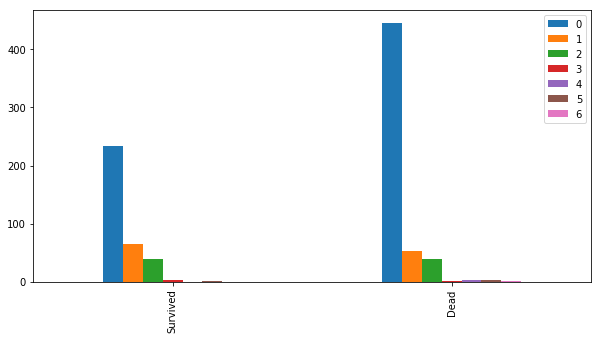

In [18]:
bar_plot('Parch')
print(train['Parch'].value_counts())
print("\nPeople who Survived\n",train[train.Survived==1]['Parch'].value_counts())

People who were with Parents or children had equal chance od survival than the people who came with no parent or child.

## 4. Feature Engineering 

Feature engineering is the process of using __domain knowledge__ of the data to create features that make machine learning algorithms work. 

FE is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

Each column is a feature. A feature vector will be a column with its values

In [8]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
Image(url='https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w')

## 4.1 Name

We will seperate the title from the name

In [9]:
train_test_data=[train,test] # combining the 2 dataframes

In [10]:
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [11]:
train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

In [131]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Ms            1
Mme           1
Jonkheer      1
Don           1
Capt          1
Sir           1
Lady          1
Name: Title, dtype: int64

In [132]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

## 4.2 Title mapping

Mr : 0  
Miss : 1  
Mrs : 2  
Others : 3

In [ ]:
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Ms            1
Mme           1
Jonkheer      1
Don           1
Capt          1
Sir           1
Lady          1

In [12]:
title_mapping={'Mr':0,
                'Miss':1,
                'Mrs':2,
                'Master':3,
                'Dr':3,
                'Rev':3,
                'Mlle':3,
                'Col':3,
                'Major':3,
                'Countess':3,
                'Ms':3,
                'Mme':3,
                'Jonkheer':3,
                'Don':3,
                'Capt':3,
                'Sir':3,
                'Lady':3
               }

In [13]:
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping).dropna().apply(np.int64)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [15]:
#Below method to change the datatype of column failed.
#test['Title']=test['Title'].dropna().astype(int)

title=test['Title'].dropna().apply(np.int64)

In [16]:
test.drop('Title',axis=1,inplace=True)
test['Title']=title

In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


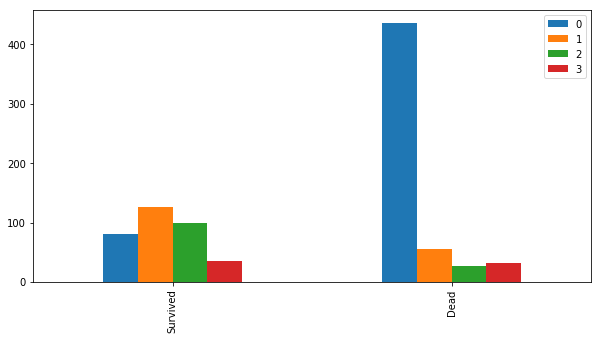

In [18]:
bar_plot('Title')

Deleting unnecessary features from the datasets

In [19]:
train.drop('Name',axis=1,inplace=True)

In [20]:
test.drop('Name',axis=1,inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


## 4.3 Sex

male : 0  
female : 1

In [23]:
sex_mapping={'male':0,
            'female':1}

In [24]:
for dataset in train_test_data:
    dataset['Sex']=dataset.Sex.map(sex_mapping)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2.0


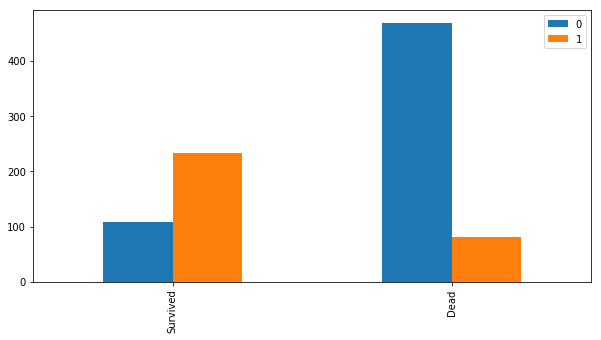

In [27]:
bar_plot('Sex')

## 4.4 Age

#### 4.4.1 Some age markings are missing. So we will fill those up using the median age 

In [171]:
train.groupby(['Title']).median()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Title,,,,,,,,
0,466.0,0.0,3.0,0.0,30.0,0.0,0.0,9.35000
1,381.5,1.0,3.0,1.0,21.0,0.0,0.0,15.62085
2,438.0,1.0,2.0,1.0,35.0,1.0,0.0,26.00000
3,450.0,1.0,2.0,0.0,9.0,1.0,1.0,29.12500


In [28]:
train.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

In [29]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)

In [30]:
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)

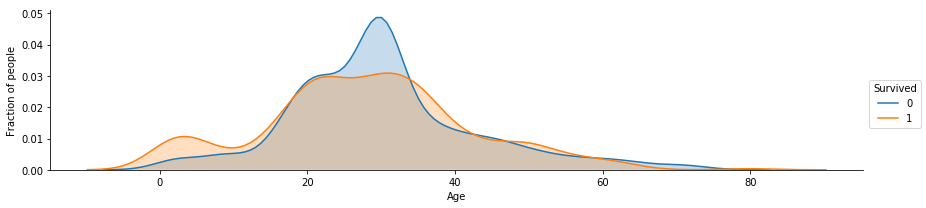

In [31]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
plt.ylabel("Fraction of people")
facet.add_legend()

(0, 30)

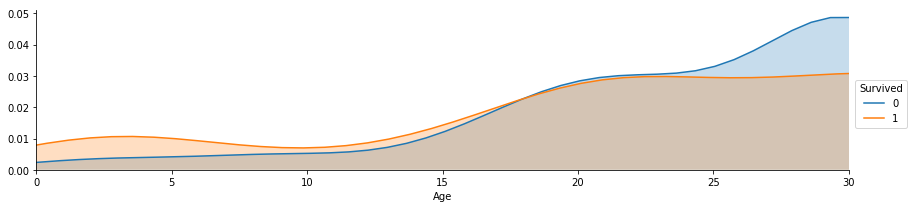

In [195]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.add_legend()
plt.xlim(0,30)

(30, 45)

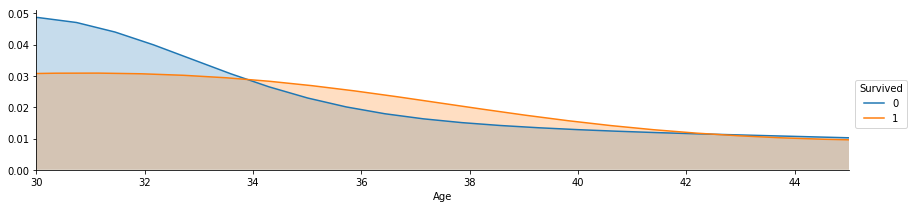

In [198]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.add_legend()
plt.xlim(30,45)

(0, 0.004)

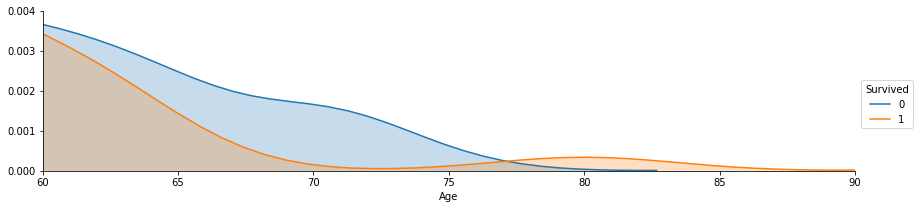

In [204]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.add_legend()
plt.xlim(60,90)
plt.ylim(0,0.004)

Cabin info is still left out

In [205]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [206]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          417 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 36.0+ KB


#### 4.4.2 Binning

Converting Numerical age to categorical value

child : 0  
young : 1  
adult : 2  
mid-age : 3  
senior : 4  

In [32]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age']=1
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age']=2
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=60),'Age']=3
    dataset.loc[dataset['Age']>60,'Age']=4

In [213]:
#train.loc[train['Age']<=16,'Age']

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [215]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,4.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2.0


## 4.5 Embarked

Filling missing values

In [36]:
train[['Embarked','Pclass']]

,Embarked,Pclass
0,S,3
1,C,1
2,S,3
3,S,1
4,S,3
5,Q,3
6,S,1
7,S,3
8,S,3
9,C,2


In [40]:
pclass1=train[train['Pclass']==1]['Embarked'].value_counts()

In [41]:
pclass1

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [42]:
pclass2=train[train['Pclass']==2]['Embarked'].value_counts()

In [43]:
pclass2

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [44]:
pclass3=train[train['Pclass']==3]['Embarked'].value_counts()

In [45]:
pclass3

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [51]:
df=pd.DataFrame(data=[pclass1,pclass2,pclass3],index=['Class 1', 'Class 2', 'Class 3'])

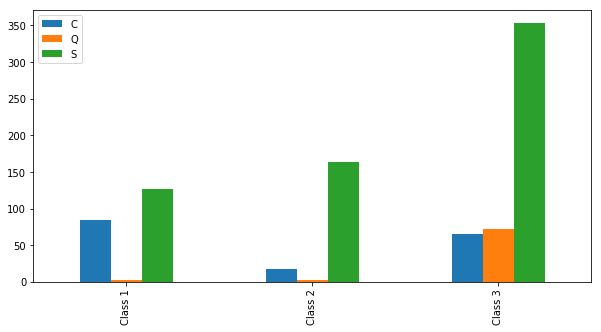

In [52]:
df.plot(kind='bar', figsize=(10,5))

In [53]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [54]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [55]:
embarked_mapping={'S':0,
                 'C':1,
                 'Q':2}

In [56]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [58]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,2,0.0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,0,2.0
2,894,2,0,4.0,0,0,240276,9.6875,NaN,2,0.0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,0,0.0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,0,2.0


In [65]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [63]:
train.groupby('Pclass')['Fare']

In [66]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

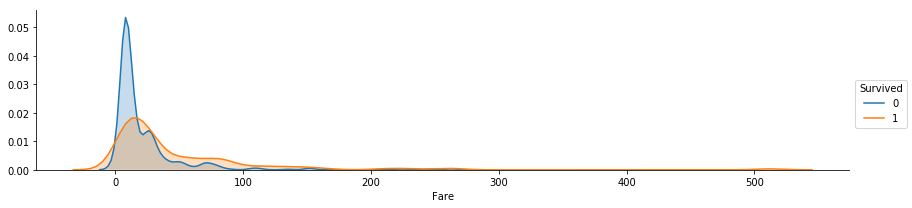

In [76]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.add_legend()

(0, 50)

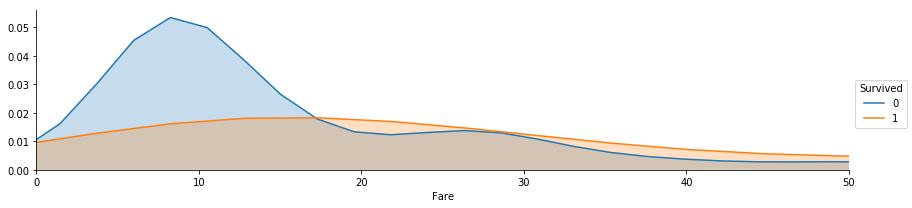

In [77]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.add_legend()
plt.xlim(0,50)

#### Binning the fare

In [84]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=20, 'Fare']=0
    dataset.loc[(dataset['Fare']>20) & (dataset['Fare']<=60), 'Fare']=1
    dataset.loc[(dataset['Fare']>60) & (dataset['Fare']<=100), 'Fare']=2
    dataset.loc[dataset['Fare']>100, 'Fare']=3

In [83]:
dataset.loc[dataset['Fare']<=20, 'Fare']

0       7.8292
1       7.0000
2       9.6875
3       8.6625
4      12.2875
5       9.2250
6       7.6292
8       7.2292
10      7.8958
16     12.3500
17      7.2250
18      7.9250
19      7.2250
21      3.1708
25     14.5000
27      7.2250
35      7.2292
36      8.0500
37      8.6625
38      9.5000
40     13.4167
42      7.8500
43     13.0000
45      7.9250
47      7.7500
49     15.9000
51     15.0333
54     15.5792
56      7.8958
57      7.6500
        ...   
359    15.5500
363     8.6625
366    14.4583
369    13.8583
370    11.5000
372     0.0000
373    13.0000
376     8.6625
377    11.5000
380     7.7500
381     7.8792
382    14.5000
383    16.1000
384    12.8750
386     7.7750
387    13.0000
388     7.7500
393    10.5000
396     7.2500
398     7.7750
399     7.7333
405    13.8625
406    10.5000
408     7.7208
409    13.7750
410     7.7500
412     7.7750
413     8.0500
415     7.2500
416     8.0500
Name: Fare, Length: 238, dtype: float64

In [85]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,1.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [93]:
test.groupby(['Fare'], axis=0).groups

{0.0: Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,  10,  16,
             ...
             399, 405, 406, 408, 409, 410, 412, 413, 415, 416],
            dtype='int64', length=238),
 1.0: Int64Index([  7,   9,  11,  13,  15,  20,  22,  28,  29,  30,
             ...
             389, 391, 392, 394, 395, 401, 402, 403, 404, 417],
            dtype='int64', length=118),
 2.0: Int64Index([ 12,  14,  23,  26,  48,  96, 118, 150, 179, 181, 188, 212, 230,
             234, 236, 270, 287, 293, 308, 327, 342, 350, 352, 353, 360, 365,
             374, 385, 390, 397, 411],
            dtype='int64'),
 3.0: Int64Index([ 24,  53,  59,  64,  69,  74,  75,  81, 114, 141, 142, 156, 184,
             196, 202, 217, 218, 239, 242, 252, 272, 306, 314, 316, 324, 343,
             371, 375, 400, 407, 414],
            dtype='int64')}

## 4.7 Cabin

In [94]:
train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
F2                 3
F33                3
E101               3
C22 C26            3
E67                2
D33                2
B57 B59 B63 B66    2
C124               2
E8                 2
B20                2
C123               2
E33                2
C2                 2
F G73              2
B5                 2
B18                2
B49                2
D20                2
C65                2
B77                2
E44                2
C83                2
D17                2
D26                2
B35                2
D35                2
                  ..
C62 C64            1
C91                1
E63                1
A32                1
A23                1
B4                 1
A19                1
E58                1
C30                1
E38                1
D47                1
E12                1
B39                1
B50                1
C103               1
E68                1
F E69        

In [107]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

In [108]:
cabin_1=train[train['Pclass']==1]['Cabin'].value_counts()
cabin_2=train[train['Pclass']==2]['Cabin'].value_counts()
cabin_3=train[train['Pclass']==3]['Cabin'].value_counts()

In [111]:
#df=pd.DataFrame(data=[cabin_1,cabin_2,cabin_3],index=['Class 1', 'Class 2','Class 3'])
pd.DataFrame(data=[cabin_1,cabin_2,cabin_3],index=['Class 1', 'Class 2','Class 3'])

,A,B,C,D,E,F,G,T
Class 1,15.0,47.0,59.0,29.0,25.0,NaN,NaN,1.0
Class 2,NaN,NaN,NaN,4.0,4.0,8.0,NaN,NaN
Class 3,NaN,NaN,NaN,NaN,3.0,5.0,4.0,NaN


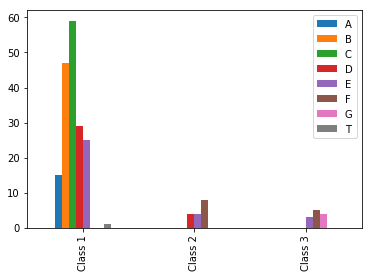

In [112]:
df.plot(kind='bar')

In [113]:
cabin_mapping={'A':0,
              'B' : 0.4,
              'C' : 0.8,
              'D' : 1.2,
              'E' : 1.6,
              'F' : 2,
              'G' : 2.4,
              'T' : 2.8}

In [114]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [115]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,1.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [120]:
 train['Cabin'].fillna(train.groupby(['Pclass'])['Cabin'].transform("median"),inplace=True)

In [121]:
test['Cabin'].fillna(test.groupby(['Pclass'])['Cabin'].transform("median"),inplace=True)

## 4.8 Family

In [122]:
train['Family_size']=train['SibSp']+train['Parch']+1 # 1 for if the person came alone, then familysize will be 0+0+1

In [123]:
test['Family_size']=test['SibSp']+test['Parch']+1 

(0, 12.258947067542628)

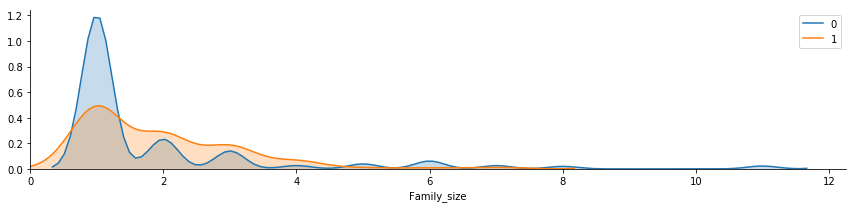

In [135]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Family_size', shade=True)
plt.legend()
plt.xlim(0)

(0, 0.1)

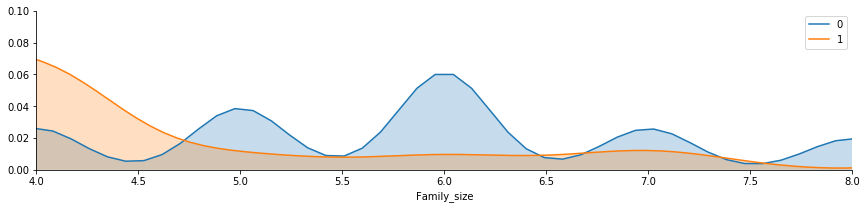

In [138]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Family_size', shade=True)
plt.legend()
plt.xlim(4,8)
plt.ylim(0,0.1)

In [140]:
train.Family_size.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

In [141]:
test.Family_size.value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: Family_size, dtype: int64

In [142]:
family_mapping={1:0,
               2 : 0.2,
               3 : 0.4,
               4 : 0.6,
               5 : 0.8,
               6 : 1.0,
               7 : 1.2,
               8 : 1.4,
               9 : 1.6,
               10 : 1.8,
               11 : 2.0}

In [147]:
train['Family_size']=train['Family_size'].map(family_mapping)

In [148]:
test['Family_size']=test['Family_size'].map(family_mapping)

In [149]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.2
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,1.0,0.8,0,2,0.2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [150]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0.0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2.0,0.2
2,894,2,0,4.0,0,0,240276,0.0,2.0,2,0.0,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0.0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2.0,0.4


In [155]:
# dropping few features which we have already combined earlier
features_drop=['SibSp', 'Parch', 'Ticket']
train.drop(features_drop, axis=1, inplace=True)

In [156]:
test.drop(features_drop,axis=1,inplace=True)

In [158]:
# We also do not require the passenger Id column
train.drop('PassengerId',axis=1,inplace=True)

In [160]:
train_data=train.drop('Survived',axis=1)

In [161]:
target=train['Survived']

In [163]:
train_data.shape, target.shape

((891, 8), (891,))

In [164]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_size
0,3,0,1.0,0.0,2.0,0,0,0.2
1,1,1,3.0,2.0,0.8,1,2,0.2
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,1.0,0.8,0,2,0.2
4,3,0,2.0,0.0,2.0,0,0,0.0


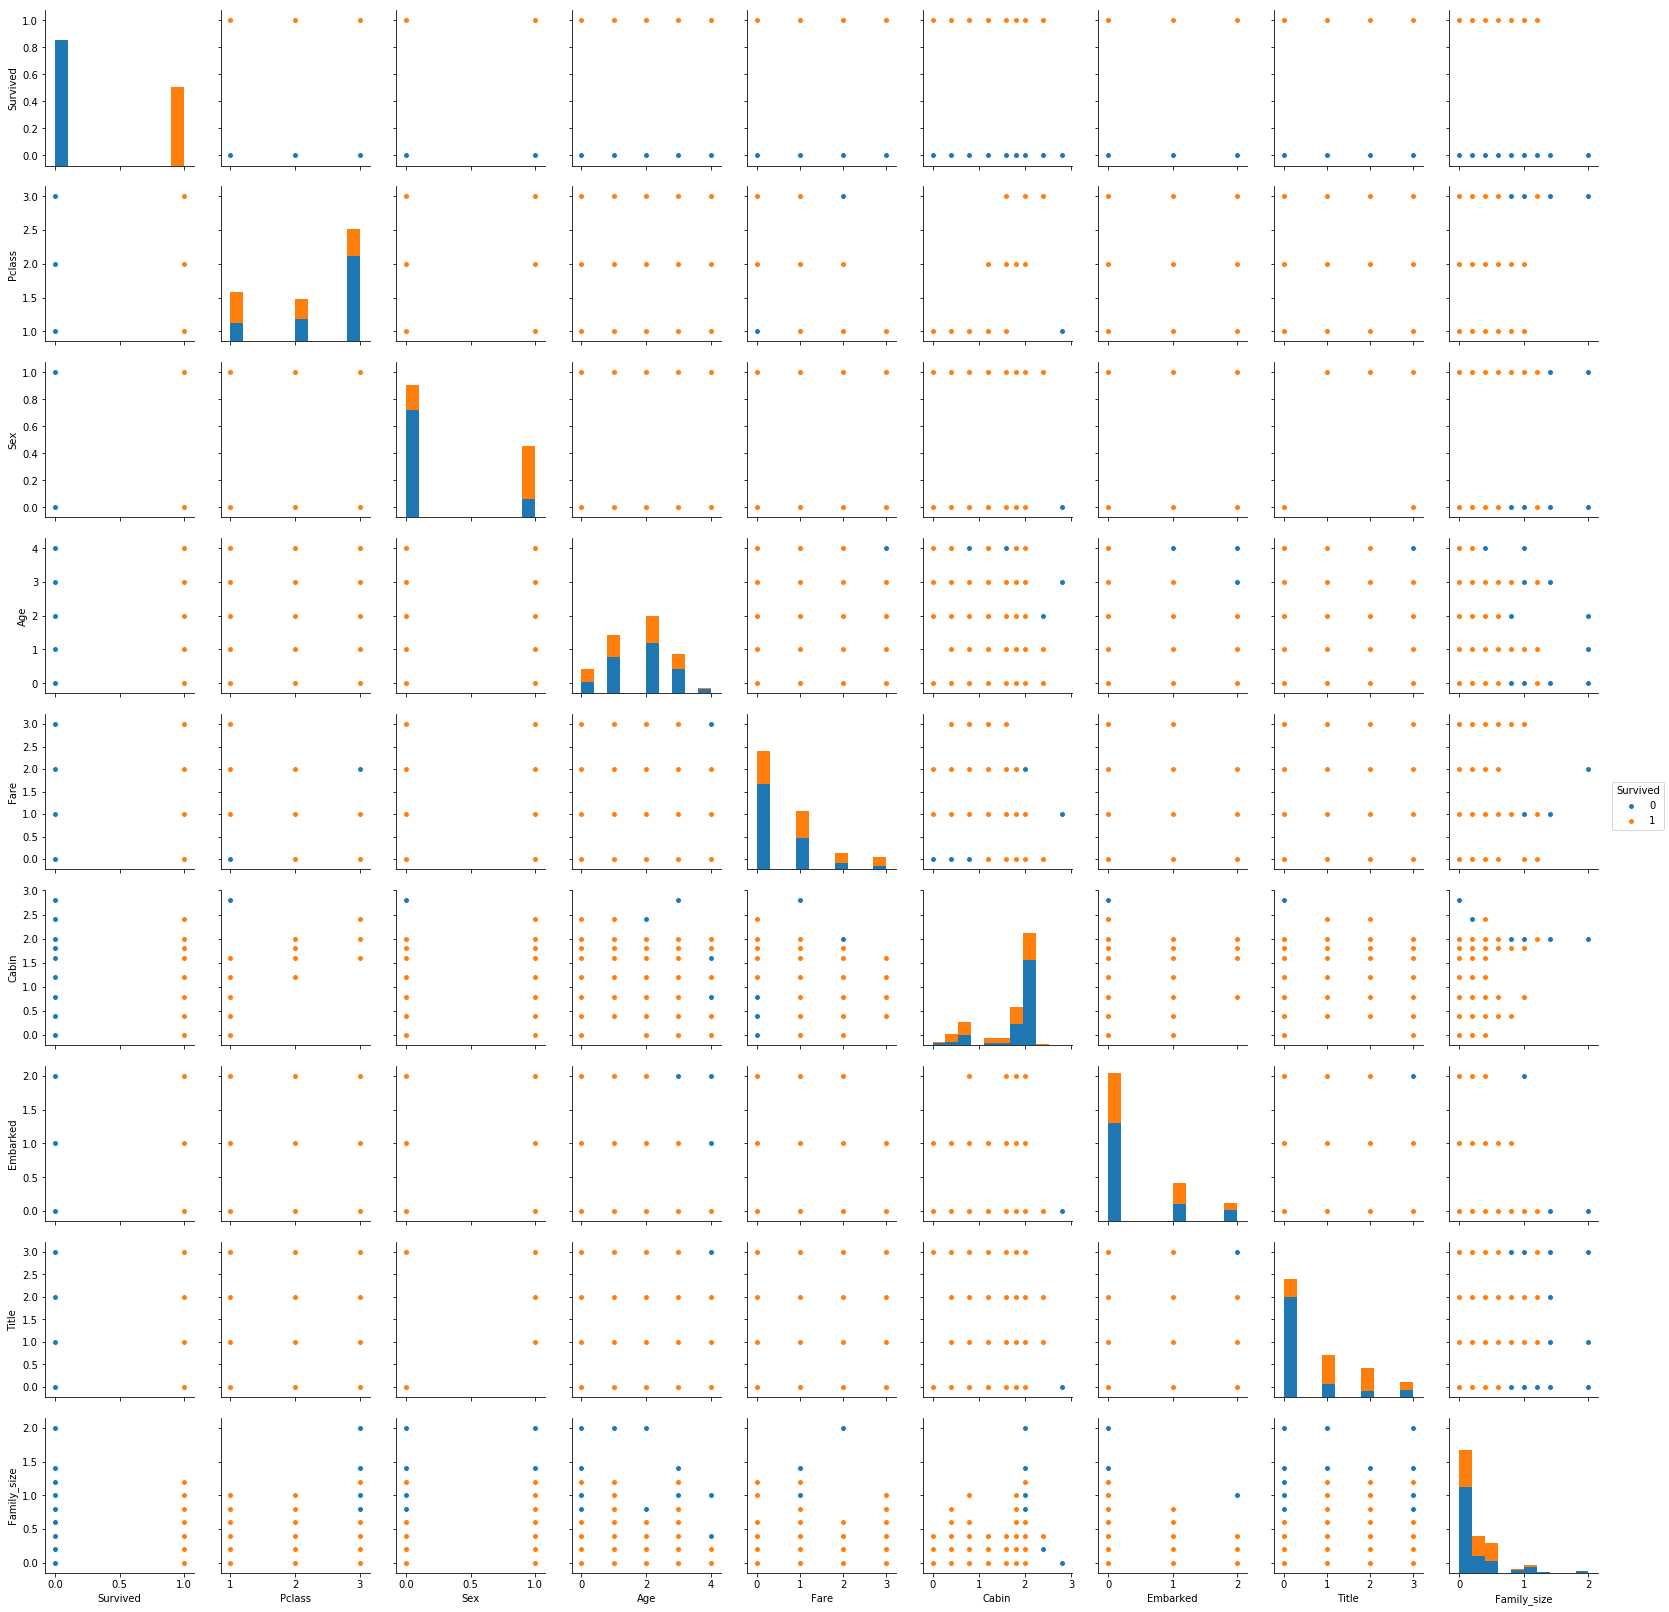

In [165]:
sns.pairplot(train, hue='Survived')

## 5. Machine Learning

## Modelling

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
Title          891 non-null int64
Family_size    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


## 6. Cross Validation

K-fold cross validation (cross validate the dataset k-times taking a small percentage of data, preferably different from previous, each time) to validate the algo.

In [171]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [243]:
k_fold=KFold(n_splits=10,shuffle=True)

In [244]:
k_fold

KFold(n_splits=10, random_state=None, shuffle=True)

## 6.1 KNN

In [245]:
knn=KNeighborsClassifier(n_neighbors=10)
scoring='accuracy'
score=cross_val_score(knn,train_data,target,scoring=scoring,cv=k_fold,n_jobs=10)

In [246]:
score

array([0.76666667, 0.86516854, 0.76404494, 0.82022472, 0.7752809 ,
       0.82022472, 0.8988764 , 0.85393258, 0.82022472, 0.7752809 ])

In [255]:
#finding mean knn score
print("KNN score : ",round(np.mean(score)*100,3))

KNN score :  81.599


In [184]:
# checking for a lot of neighbours
from sklearn.cross_validation import train_test_split


In [248]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.33, random_state=50)
score_perform=list()
for i in range(1,20):
    knn_check = KNeighborsClassifier(n_neighbors=i)
    knn_check.fit(X_train,y_train)
    predict=knn_check.predict(X_test)
    #print(np.absolute(predict-y_test).mean())
    score_perform.append(np.absolute(predict-y_test).mean())

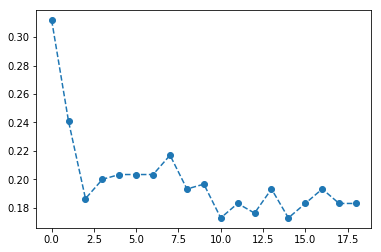

In [249]:
plt.Figure(figsize=(10,5))
plt.plot(score_perform,linestyle='dashed', marker='o')

(0.17, 0.23)

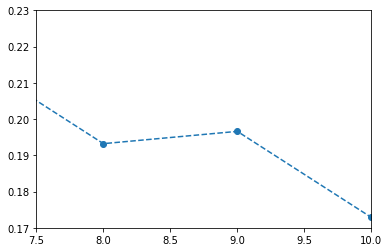

In [250]:
plt.Figure(figsize=(10,5))
plt.plot(score_perform,linestyle='dashed', marker='o')
plt.xlim(7.5,10)
plt.ylim(0.17,0.23)

## 6.2 Decision Tree

In [256]:
dtm=DecisionTreeClassifier()

In [257]:
scoring='accuracy'
score=cross_val_score(dtm,train_data,target,scoring=scoring,cv=k_fold,n_jobs=10)
score

array([0.8       , 0.70786517, 0.7752809 , 0.78651685, 0.74157303,
       0.75280899, 0.76404494, 0.86516854, 0.82022472, 0.74157303])

In [260]:
print("Decision Tree : ", (np.mean(score)*100))

Decision Tree :  77.5505617977528


## 6.3 Random Forest

In [267]:
rfm=RandomForestClassifier(n_estimators=200)
scoring='accuracy'
score=cross_val_score(rfm,train_data,target,scoring=scoring,cv=k_fold,n_jobs=10)
print("Random Forest : ",np.mean(score)*100)

Random Forest :  80.2421972534332


## 6.4 Naive Bayes

In [268]:
nba=GaussianNB()
scoring='accuracy'
score=cross_val_score(nba,train_data,target,scoring=scoring,cv=k_fold,n_jobs=10)
print("Gaussian Naive Bayes : ",np.mean(score)*100)

Gaussian Naive Bayes :  78.11860174781525


## 6.5 SVM

In [277]:
svc=SVC()
scoring='accuracy'
score=cross_val_score(svc,train_data,target,scoring=scoring, cv=k_fold, n_jobs=10)
print("SVM : ", np.mean(score)*100)

SVM :  82.94506866416978


## Testing

### As SVM gave the best performance, we will carry forward our data training using svm.

In [278]:
svm=SVC()
svm.fit(train_data,target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [307]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null float64
Embarked       418 non-null int64
Title          417 non-null float64
Family_size    418 non-null float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


In [309]:
test.Title.fillna(value=0,inplace=True)

In [310]:
test_data=test.drop('PassengerId', axis=1)

In [312]:
predict=svm.predict(test_data)

In [324]:
submit=pd.DataFrame({'PassengerId' : test.PassengerId,
                    'Survived' : predict})

In [328]:
submit.to_csv('Submission.csv',index=False)

In [331]:
submit=pd.read_csv('Submission.csv')
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## Well we tried, Current Rank is 3438

### let's try increasing the accuracy and reducing our rank

## 1. GridSearchCV

In [332]:
from sklearn.grid_search import GridSearchCV

In [335]:
# param_grid the parameters which I want to test on to check for the best combination
svc.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

In [377]:
param_grid={'C':[1],
           'gamma':[100,10,1,0.1,0.01,0.001,0.0001]
           }

In [378]:
grid_model=GridSearchCV(SVC(),param_grid,verbose=3)

In [379]:
grid_model.fit(train_data,target)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=1, gamma=100 ..................................................
[CV] ......................... C=1, gamma=100, score=0.693603 -   0.0s
[CV] C=1, gamma=100 ..................................................
[CV] ......................... C=1, gamma=100, score=0.737374 -   0.0s
[CV] C=1, gamma=100 ..................................................
[CV] ......................... C=1, gamma=100, score=0.791246 -   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .......................... C=1, gamma=10, score=0.737374 -   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .......................... C=1, gamma=10, score=0.811448 -   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .......................... C=1, gamma=10, score=0.794613 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................... C=1, gamma=1, score=0.845118 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.824916 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.845118 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.831650 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.764310 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.808081 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.777778 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1], 'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [380]:
grid_model.best_params_

{'C': 1, 'gamma': 1}

In [381]:
grid_model.best_score_

0.835016835016835

#### Performance estimation
#1 {'C': 1, 'gamma': 1} : 0.835016835016835
#2 {'C': 1000, 'gamma': 0.01} : 0.8361391694725028


In [382]:
best_svc=SVC(C=1000,gamma=0.01,random_state=50)

In [383]:
best_svc.fit(train_data,target)
prediction=best_svc.predict(test_data)

In [384]:
submission=pd.DataFrame({'PassengerId':test.PassengerId,
                        'Survived':prediction})
submission.to_csv('Submission#2.csv',index=False)
submission=pd.read_csv('Submission#2.csv')
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## Rank improved to 1657

#### Your submission scored 0.79904, which is an improvement of your previous score of 0.78947, but still not over the 80% threshold